In [1]:
import pandas as pd

from collections import Counter
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import nltk
from nltk import ngrams

In [3]:
df = pd.read_csv('preprocessed_data.csv')

In [4]:
df['transcript']

0      ['cláusula', 'publicar', 'lunes', 'decir', 'sh...
1      ['oscidiáis', 'equipo', 'kings', 'leagar', 'pr...
2      ['holar', 'amigo', 'amiga', 'estáis', 'venir',...
3      ['últimamente', 'perder', 'mañana', 'jueves', ...
4      ['viernes', 'amigo', 'eliminar', 'sábado', 'te...
                             ...                        
327    ['chico', 'cosa', 'habéis', 'pedido', 'vídeo',...
328    ['llegar', 'turno', 'estimar', 'chico', 'chico...
329    ['gente', 'pintor', 'pintura', 'pintura', 'spa...
330    ['im ', 'here', 'i', 'have', 'arrived', 'ill',...
331    ['buscar', 'ping', 'border', 'collie', 'entren...
Name: transcript, Length: 332, dtype: object

In [5]:
occurrences_per_transcript = df['transcript'].str.count(r'xxxx')

# Calculate total occurrences
total_insults = occurrences_per_transcript.sum()

# Calculate average occurrence per transcript
average_occurrence = total_insults / len(df)

print(f"Average occurrences of 'xxxx' per transcript: {average_occurrence:.2f}")
print(f"Total occurrences of 'xxxx' per transcript: {total_insults:.2f}")

Average occurrences of 'xxxx' per transcript: 1.93
Total occurrences of 'xxxx' per transcript: 642.00


In [6]:
import ast

processed_transcripts = df['transcript'].apply(ast.literal_eval)


In [7]:
type(processed_transcripts)

pandas.core.series.Series

In [8]:
# 1. Identify commonly used phrases using N-grams
all_ngrams = [ngram for transcript in processed_transcripts for ngram in ngrams(transcript, 3)]  # trigrams
common_phrases = Counter(all_ngrams).most_common(20)
print("Common Phrases:")
for phrase, freq in common_phrases:
    print(f"{' '.join(phrase)}: {freq}")

Common Phrases:
ay ay ay: 462
caer puta madre: 239
eh eh eh: 171
uy uy uy: 159
gol gol gol: 152
valer valer valer: 121
mira mira mira: 120
polla polla polla: 51
cuidado cuidado cuidado: 48
elegir categoría puntuación: 41
oy oy oy: 40
hola hola hola: 40
allez allez allez: 39
pol pol pol: 38
música música música: 37
pa pa pa: 32
aplauso música aplauso: 30
combate velada año: 28
josé luis blanco: 28
ey ey ey: 27


In [9]:
# 2. Identify topics using LDA
dictionary = Dictionary(processed_transcripts)
corpus = [dictionary.doc2bow(transcript) for transcript in processed_transcripts]
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=5, passes=15, workers=4)
print("\nTopics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx}, Words: {topic}")


Topics:
Topic: 0, Words: 0.010*"valer" + 0.008*"eh" + 0.007*"ver" + 0.006*"música" + 0.006*"venir" + 0.006*"haber" + 0.006*"decir" + 0.005*"pasar" + 0.005*"tío" + 0.005*"gustar"
Topic: 1, Words: 0.010*"ver" + 0.009*"decir" + 0.008*"gente" + 0.008*"querer" + 0.006*"año" + 0.006*"pasar" + 0.006*"combate" + 0.006*"haber" + 0.005*"cosa" + 0.005*"venir"
Topic: 2, Words: 0.010*"ver" + 0.008*"ander" + 0.008*"eh" + 0.007*"vuelta" + 0.007*"salir" + 0.007*"equipo" + 0.006*"carrera" + 0.006*"karchez" + 0.006*"quedar" + 0.006*"venir"
Topic: 3, Words: 0.014*"eh" + 0.014*"tío" + 0.010*"valer" + 0.010*"ríe" + 0.010*"puta" + 0.009*"ibai" + 0.008*"ay" + 0.007*"reír" + 0.007*"ver" + 0.006*"venir"
Topic: 4, Words: 0.009*"ver" + 0.009*"the" + 0.008*"música" + 0.007*"gustar" + 0.006*"decir" + 0.005*"querer" + 0.005*"cosa" + 0.005*"to" + 0.005*"gente" + 0.005*"año"


In [10]:
# 3. Identify unique terms/values using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.85)
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(transcript) for transcript in processed_transcripts])
feature_names = tfidf_vectorizer.get_feature_names_out()
sorted_items = sorted(list(enumerate(tfidf_matrix.sum(axis=0).tolist()[0])), key=lambda x: x[1], reverse=True)
print("\nUnique Terms:")
for idx, score in sorted_items[:10]:
    print(f"{feature_names[idx]}: {score}")



Unique Terms:
eh: 15.369802854616294
tío: 14.410832245053212
música: 13.55182353825893
ríe: 12.329938487346627
valer: 11.739517901292501
xxxx: 10.656477330283549
ibai: 10.156026667928147
pasar: 10.048462351217696
venir: 9.938527887696239
ay: 9.815273965738031


In [11]:
all_tokens = [token for transcript in processed_transcripts for token in transcript]

# Count the occurrences of each token
word_freq = Counter(all_tokens)

# Display the 10 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('ver', 3342), ('eh', 3203), ('valer', 2650), ('tío', 2530), ('decir', 2259), ('venir', 2249), ('pasar', 2213), ('querer', 2097), ('música', 2094), ('haber', 1940), ('gente', 1842), ('estar', 1758), ('ibai', 1713), ('cosa', 1694), ('gustar', 1691)]
      Word  Frequency
0      ver       3342
1       eh       3203
2    valer       2650
3      tío       2530
4    decir       2259
5    venir       2249
6    pasar       2213
7   querer       2097
8   música       2094
9    haber       1940
10   gente       1842
11   estar       1758
12    ibai       1713
13    cosa       1694
14  gustar       1691


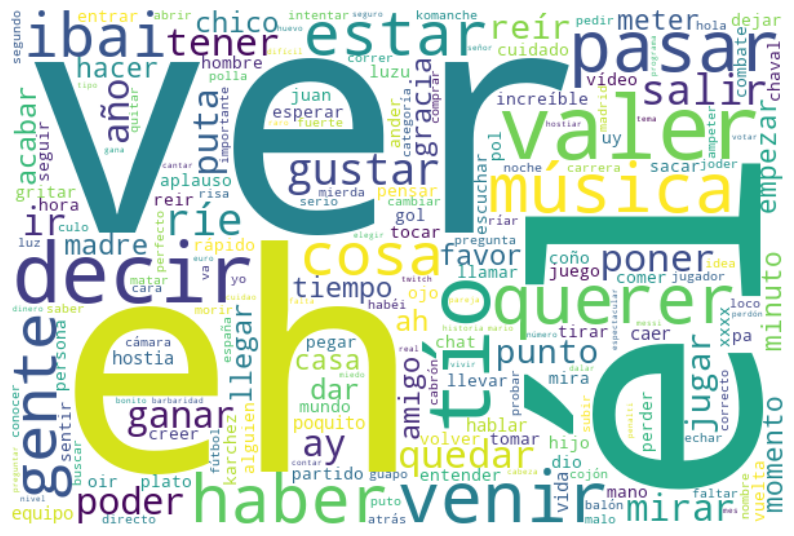

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert the list of tokens back into a single string for each transcript
all_text = ' '.join([' '.join(transcript) for transcript in processed_transcripts])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(all_text)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("transcript_wordcloud.png")

plt.show()